## Keyword Extraction with bi-LSTM

## TODO: add run instructions, comment out code not ment to be run, update datapath before submission, add appropriately comment to blocks, clean up code, ensure modularity, modify code to make visual from loaded models


In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

# import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

In [2]:
import util as util

[nltk_data] Downloading package punkt to /Users/juneechen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juneechen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juneechen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# get word embeddings from the gensim package
import gensim.downloader

# download the glove embeddings
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [4]:
TRAIN_PATH = '../dataset/SciHTC/train_title_abstract_keywords.csv'
TEST_PATH = '../dataset/SciHTC/test_title_abstract_keywords.csv'
# DEV_PATH = '../dataset/SciHTC/dev_title_abstract_keywords.csv'

# TRAIN_PATH = '/home/bindra.p/cs6140/Datasets/SciHTC/train_title_abstract_keywords.csv'
# TEST_PATH = '/home/bindra.p/cs6140/Datasets/SciHTC/test_title_abstract_keywords.csv'
# DEV_PATH = '/home/bindra.p/cs6140/Datasets/SciHTC/dev_title_abstract_keywords.csv'

In [7]:
MAX_LEN = 250
EMBEDDING_DIM = 50
SAMPLE_SIZE = 18000

In [8]:
# read train and test data, this block takes about 4m to run for a sample size of 18000
train_df = util.read_data(TRAIN_PATH)
test_df = util.read_data(TEST_PATH)

input_cols = ['Title', 'Abstract']

# process the data and sample some for testing; it changes to df in place.
# Reload df if running again
train_df = util.preprocess_data(train_df, input_cols, 'Keywords', sample_size=None)
test_df = util.preprocess_data(test_df, input_cols, 'Keywords', sample_size=None)

# set up the tokenizer
tokenizer = util.setup_tokenizer(train_df, test_df, ['input_tokens', 'clean_kp'])

# create embeddings matrix
embeddings_matrix = util.get_embeddings_matrix(tokenizer, glove_vectors, EMBEDDING_DIM)

# create the input array
X_train, y_train = util.create_input_array(train_df, 'input_tokens', 'clean_kp', tokenizer,
                                           embeddings_matrix, EMBEDDING_DIM, MAX_LEN)

X_test, y_test = util.create_input_array(test_df, 'input_tokens', 'clean_kp', tokenizer,
                                            embeddings_matrix, EMBEDDING_DIM, MAX_LEN)

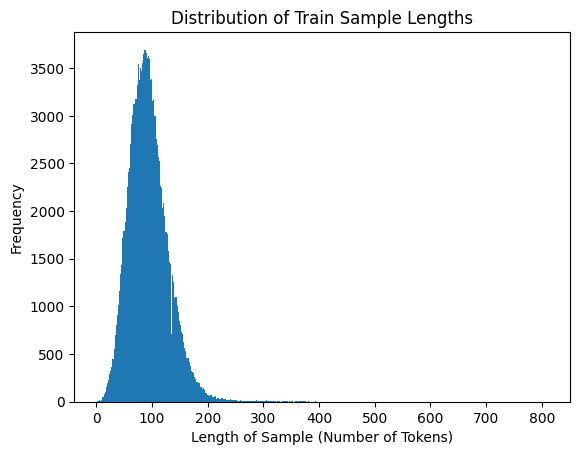

      count      mean        std  min   25%   50%    75%    95%    max
0  148928.0  94.02702  36.868197  1.0  69.0  90.0  114.0  156.0  811.0


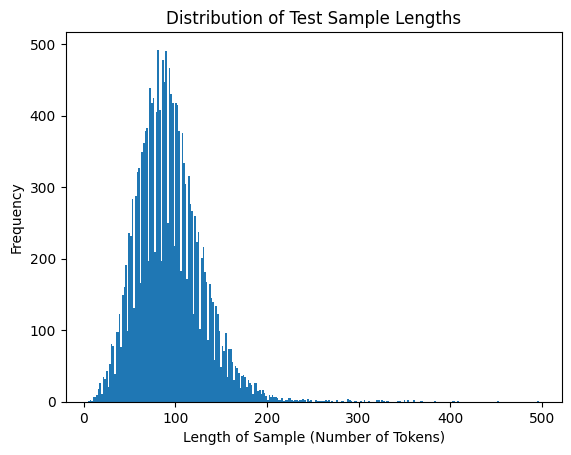

     count       mean        std  min   25%   50%    75%    95%    max
0  18616.0  94.053234  36.675551  5.0  69.0  91.0  114.0  157.0  497.0


In [10]:
# plot the input samples length distribution to find the optimal MAX_LEN for padding and truncating
util.plot_sample_len_distribution(train_df, 'input_tokens', 'Distribution of Train Sample Lengths')
util.plot_sample_len_distribution(test_df, 'input_tokens', 'Distribution of Test Sample Lengths')

### Model Building and Fitting
Note: these blocks are commented out because it takes too long to train. We have saved 3 models we trained with different setups, which will be loaded in later block for making predictions.

In [15]:
# # build bi-LSTM model
# model = Sequential()

# # Shujun
# # model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(MAX_LEN, EMBEDDING_DIM)))
# # model.add(Bidirectional(LSTM(64)))
# # model.add(Dense(MAX_LEN, activation='sigmoid'))
# # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.3), input_shape=(MAX_LEN, EMBEDDING_DIM)))
# model.add(Bidirectional(LSTM(32, dropout=0.2)))
# model.add(Dense(MAX_LEN, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

# model.summary()

2023-12-05 18:40:49.013216: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-05 18:40:49.013887: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-05 18:40:49.013931: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-05 18:40:49.014832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 18:40:49.014869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 500, 64)           21248     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
Total params: 78580 (306.95 KB)
Trainable params: 78580 (306.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# fit model, commented out because we have saved the model and it is loaded below
# model_data = model.fit(X_train, y_train, epochs=5, verbose=1)

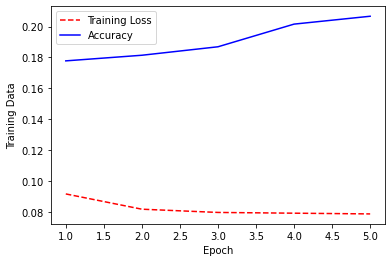

In [ ]:
# loss = model_data.history['loss']
# acc = model_data.history['accuracy']
# epoch_count = range(1, len(loss) + 1)

# # Visualize graph
# plt.plot(epoch_count, loss, 'r--')
# plt.plot(epoch_count, acc, 'b-')
# plt.legend(['Training Loss', 'Accuracy'])
# plt.xlabel('Epoch')  
# plt.ylabel('Training Data')
# plt.show()

In [ ]:
# model.save('/home/bindra.p/cs6140/bi_lstm_model_3')

INFO:tensorflow:Assets written to: /home/bindra.p/cs6140/bi_lstm_model_3/assets


INFO:tensorflow:Assets written to: /home/bindra.p/cs6140/bi_lstm_model_3/assets


### Load saved models
3 saved models loaded below:    

< ❗️leava a one-line comment about the setting for each?>

In [4]:
# takes about 12s to load
model_1 = tf.keras.models.load_model('bi_lstm_model_1')
model_2 = tf.keras.models.load_model('bi_lstm_model_2')
model_3 = tf.keras.models.load_model('bi_lstm_model_3')

2023-12-06 10:46:01.825863: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-06 10:46:01.825893: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-06 10:46:01.825904: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-06 10:46:01.825971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-06 10:46:01.826177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 500, 128)          58880     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 500)               64500     
                                                                 
Total params: 222196 (867.95 KB)
Trainable params: 222196 (867.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 500, 64)           21248     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
Total params: 78580 (306.95 KB)
Trainable params: 78580 (306.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 500, 64)           21248     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 500)               32500     
                                                                 
Total params: 78580 (306.95 KB)
Trainable params: 78580 (306.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predictions, Evaluation, and Inference

In [18]:
# testing prediction - MODEL 1
preds = model_1.predict(X_test)

# convert probability predictions back to keywords
pred_kws = util.pred_to_keywords(preds, test_df['input_tokens'].values, threshold=0.35)
# print prediction
for i, each in enumerate(pred_kws[:10]):
    print("actual:",test_df['clean_kp'].values[i])  
    print("predicted:",each)
    print()

582/582 [==============================] - 44s 75ms/step
actual: ['asic', 'cad', 'eda', 'layout', 'logic', 'mooc', 'vlsi']
predicted: ['eda', 'mooc', 'massive']

actual: ['attitude', 'e-participation', 'gamification', 'public participation', 'usage behavior']
predicted: ['public', 'participation', 'despite']

actual: ['anonymous', 'conversation', 'cue', 'voting']
predicted: ['vote', 'work', 'describe']

actual: ['electromagnetism', 'evolutionary algorithm', 'multi-objective optimization', 'resource-constrained project scheduling']
predicted: ['electromagnetism', 'multi-objective', 'evolutionary']

actual: ['consciousness', 'constraint', 'creativity', 'digital fine art', 'freedom']
predicted: ['constraint', 'creative', 'process']

actual: ['energy use', 'feedback', 'interaction design', 'persuasive computing', 'sustainability', 'visualization']
predicted: ['electricity', 'production', 'emits']

actual: ['guided search', 'model checking', 'verification']
predicted: ['based', 'design', 'e

In [33]:
# print evaluation metrics
util.evaluate_preds(preds, y_test, threshold=0.35)

Precision: 0.46538114843959366
Recall: 0.13996556271981242
F1: 0.21520670095253117


In [19]:
# testing prediction - MODEL 2
preds = model_2.predict(X_test)
    
# convert probability predictions back to keywords
pred_kws = util.pred_to_keywords(preds, test_df['input_tokens'].values, threshold=0.35)

# print evaluation metrics
util.evaluate_preds(preds, y_test, threshold=0.35)

# print prediction
for i, each in enumerate(pred_kws[:10]):
    print("actual:",test_df['clean_kp'].values[i])  
    print("predicted:",each)
    print()

582/582 [==============================] - 41s 68ms/step
actual: ['asic', 'cad', 'eda', 'layout', 'logic', 'mooc', 'vlsi']
predicted: ['eda', 'mooc', 'massive', 'open']

actual: ['attitude', 'e-participation', 'gamification', 'public participation', 'usage behavior']
predicted: ['public', 'participation', 'despite', 'many']

actual: ['anonymous', 'conversation', 'cue', 'voting']
predicted: ['vote', 'work', 'describe', 'conversation']

actual: ['electromagnetism', 'evolutionary algorithm', 'multi-objective optimization', 'resource-constrained project scheduling']
predicted: ['electromagnetism', 'multi-objective', 'evolutionary', 'algorithm']

actual: ['consciousness', 'constraint', 'creativity', 'digital fine art', 'freedom']
predicted: ['constraint', 'creative', 'process', 'digital']

actual: ['energy use', 'feedback', 'interaction design', 'persuasive computing', 'sustainability', 'visualization']
predicted: ['electricity', 'production', 'emits', 'carbon']

actual: ['guided search', '

In [20]:
# testing prediction - MODEL 3
preds = model_3.predict(X_test)
    
# convert probability predictions back to keywords with threshold 0.35
pred_kws = util.pred_to_keywords(preds, test_df['input_tokens'].values, threshold=0.35)

# print evaluation metrics
util.evaluate_preds(preds, y_test, threshold=0.35)

# print prediction
for i, each in enumerate(pred_kws[:5]):
    print("actual:",test_df['clean_kp'].values[i])  
    print("predicted:",each)
    print()

582/582 [==============================] - 42s 68ms/step
actual: ['asic', 'cad', 'eda', 'layout', 'logic', 'mooc', 'vlsi']
predicted: ['mooc', 'massive', 'open']

actual: ['attitude', 'e-participation', 'gamification', 'public participation', 'usage behavior']
predicted: ['gamers', 'public']

actual: ['anonymous', 'conversation', 'cue', 'voting']
predicted: []

actual: ['electromagnetism', 'evolutionary algorithm', 'multi-objective optimization', 'resource-constrained project scheduling']
predicted: ['hybridization', 'electromagnetism', 'multi-objective', 'evolutionary', 'algorithm', 'rcpsp']

actual: ['consciousness', 'constraint', 'creativity', 'digital fine art', 'freedom']
predicted: ['freedom', 'constraint', 'creative', 'process', 'digital']

actual: ['energy use', 'feedback', 'interaction design', 'persuasive computing', 'sustainability', 'visualization']
predicted: ['electricity', 'production', 'emits', 'carbon', 'dioxide']

actual: ['guided search', 'model checking', 'verificat

In [ ]:
# print evaluation metrics
util.evaluate_preds(preds, y_test, threshold=0.35)

In [22]:
# testing prediction - MODEL 3
# preds = model_3.predict(X_test)
    
# convert probability predictions back to keywords with threshold 0.3
pred_kws = util.pred_to_keywords(preds, test_df['input_tokens'].values, threshold=0.3)

# print evaluation metrics
util.evaluate_preds(preds, y_test, threshold=0.35)

# print prediction
for i, each in enumerate(pred_kws[:5]):
    print("actual:",test_df['clean_kp'].values[i])  
    print("predicted:",each)
    print()


actual: ['asic', 'cad', 'eda', 'layout', 'logic', 'mooc', 'vlsi']
predicted: ['eda', 'mooc', 'massive', 'open', 'online']

actual: ['attitude', 'e-participation', 'gamification', 'public participation', 'usage behavior']
predicted: ['gamers', 'public']

actual: ['anonymous', 'conversation', 'cue', 'voting']
predicted: []

actual: ['electromagnetism', 'evolutionary algorithm', 'multi-objective optimization', 'resource-constrained project scheduling']
predicted: ['hybridization', 'electromagnetism', 'multi-objective', 'evolutionary', 'algorithm', 'rcpsp', 'one', 'challenging']

actual: ['consciousness', 'constraint', 'creativity', 'digital fine art', 'freedom']
predicted: ['freedom', 'constraint', 'creative', 'process', 'digital']

actual: ['energy use', 'feedback', 'interaction design', 'persuasive computing', 'sustainability', 'visualization']
predicted: ['electricity', 'production', 'emits', 'carbon', 'dioxide']

actual: ['guided search', 'model checking', 'verification']
predicted: [